In [2]:
import numpy as np # forlinear algebra
import matplotlib.pyplot as plt #for plotting things
import os
from PIL import Image # for reading images
# Keras Libraries <- CNN
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, Model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D,Flatten, Dense, Input, BatchNormalization, Concatenate, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

2024-05-29 17:02:55.824799: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-29 17:02:55.825029: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-29 17:02:55.827111: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-29 17:02:55.854438: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-29 17:02:56.345727: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

['test', 'train', 'val']
1341
normal picture title:  IM-0327-0001.jpeg
pneumonia picture title: person657_bacteria_2549.jpeg


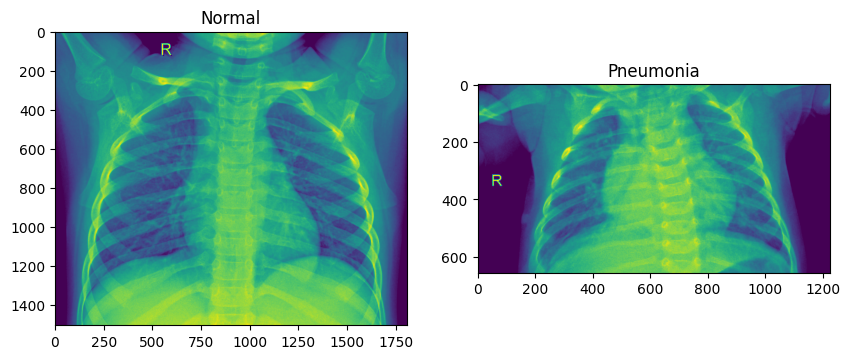

In [3]:
mainDIR = os.listdir('./chest_xray')
print(mainDIR)
train_folder= './chest_xray/train/'
val_folder = './chest_xray/val/'
test_folder = './chest_xray/test/'
# train
os.listdir(train_folder)
train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'
#Normal pic
print(len(os.listdir(train_n)))
rand_norm= np.random.randint(0,len(os.listdir(train_n)))
norm_pic = os.listdir(train_n)[rand_norm]
print('normal picture title: ',norm_pic)
norm_pic_address = train_n+norm_pic
#Pneumonia
rand_p = np.random.randint(0,len(os.listdir(train_p)))
sic_pic = os.listdir(train_p)[rand_norm]
sic_address = train_p+sic_pic
print('pneumonia picture title:', sic_pic)
norm_load = Image.open(norm_pic_address)
sic_load = Image.open(sic_address)
#Let's plt these images
f = plt.figure(figsize= (10,6))
a1 = f.add_subplot(1,2,1)
img_plot = plt.imshow(norm_load)
a1.set_title('Normal')
a2 = f.add_subplot(1, 2, 2)
img_plot = plt.imshow(sic_load)
a2.set_title('Pneumonia')
plt.show()
# let's build the CNN model

In [4]:
#cnn = Sequential()
#Convolution
model_in = Input(shape = (64, 64, 3))
model = Flatten()(model_in)
# Fully Connected Layers
model = Dense(activation = 'relu', units = 128) (model)
model = Dense(activation = 'sigmoid', units = 1)(model)
# Compile the Neural network
model_fin = Model(inputs=model_in, outputs=model)
model_fin.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics =['accuracy'])

In [5]:
num_of_test_samples = 600
batch_size = 32
# Fitting the CNN to the images
# The function ImageDataGenerator augments your image by iterating through image asyour CNN is getting ready to process that image
train_datagen = ImageDataGenerator(rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
#Image normalization.
training_set = train_datagen.flow_from_directory('./chest_xray/train',
target_size = (64, 64),
batch_size = 32,
class_mode = 'binary')

Found 5216 images belonging to 2 classes.


In [6]:
validation_generator = test_datagen.flow_from_directory('./chest_xray/val/',
target_size=(64, 64),
batch_size=32,
class_mode='binary')
test_set = test_datagen.flow_from_directory('./chest_xray/test',
target_size = (64, 64),
batch_size = 32,
class_mode = 'binary')
model_fin.summary()

Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12288)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,572,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,573,121 (6.00 MB)

 Trainable params: 1,573,121 (6.00 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
pip install scipy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [8]:
cnn_model = model_fin.fit(training_set,
steps_per_epoch = 163,
epochs = 10,
validation_data = validation_generator,
validation_steps = 624)
test_accu = model_fin.evaluate(test_set,steps=624)
model_fin.save('medical_ann.h5')
print('The testing accuracy is :',test_accu[1]*100, '%')
Y_pred = model_fin.predict(test_set, 100)
y_pred = np.argmax(Y_pred, axis=1)
max(y_pred)

Epoch 1/10


/home/ubuntu/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 24s 137ms/step - accuracy: 0.7432 - loss: 1.2838 - val_accuracy: 0.6875 - val_loss: 0.4917
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6875 - val_loss: 0.4917
Epoch 3/10


2024-05-29 17:03:31.687447: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-05-29 17:03:31.696180: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-29 17:03:31.777225: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


163/163 ━━━━━━━━━━━━━━━━━━━━ 23s 135ms/step - accuracy: 0.8686 - loss: 0.3098 - val_accuracy: 0.6250 - val_loss: 0.5851
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6250 - val_loss: 0.5851
Epoch 5/10


2024-05-29 17:03:54.945101: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-29 17:03:54.951263: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-29 17:03:55.031584: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


163/163 ━━━━━━━━━━━━━━━━━━━━ 23s 135ms/step - accuracy: 0.8760 - loss: 0.2912 - val_accuracy: 0.8125 - val_loss: 0.4770
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8125 - val_loss: 0.4770
Epoch 7/10


2024-05-29 17:04:18.125050: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-29 17:04:18.131583: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-29 17:04:18.225922: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


163/163 ━━━━━━━━━━━━━━━━━━━━ 23s 136ms/step - accuracy: 0.8863 - loss: 0.2698 - val_accuracy: 0.8125 - val_loss: 0.4760
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8125 - val_loss: 0.4760
Epoch 9/10


2024-05-29 17:04:41.362855: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-29 17:04:41.369874: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-29 17:04:41.452649: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


163/163 ━━━━━━━━━━━━━━━━━━━━ 23s 135ms/step - accuracy: 0.8856 - loss: 0.2601 - val_accuracy: 0.8125 - val_loss: 0.4318
Epoch 10/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8125 - val_loss: 0.4318


2024-05-29 17:05:04.492218: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-29 17:05:04.498524: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-29 17:05:04.582182: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


624/624 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8503 - loss: 0.3389    


2024-05-29 17:05:06.885345: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


The testing accuracy is : 85.09615659713745 %
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step


0

In [10]:
np.shape(y_pred)

(624,)

In [11]:
import numpy as np # forlinear algebra
import matplotlib.pyplot as plt #for plotting things
import os
from PIL import Image # for reading images
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img


#from sklearn.metrics import classification_report, confusion_matrix # <- define evaluation metrics
test_datagen = ImageDataGenerator(rescale = 1./255)  #Image normalization.
test_set = test_datagen.flow_from_directory('./chest_xray/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')
model_fin = keras.models.load_model('./medical_ann.h5')
test_accu = model_fin.evaluate(test_set, steps=624)
print('The testing accuracy is :',test_accu[1]*100, '%')

# label 얻기 
labels = test_set.labels

Y_pred = model_fin.predict(test_set)
#y_pred = np.argmax(Y_pred)
y_pred = []
for yy in Y_pred:
    if yy >= 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
class_name = ["NORMAL", "PNEUMONIA"]
print("actual || predict")
for i in range(624):
    if i%10 == 0:
        print(class_name[labels[i]], end=" || ")
        print(class_name[y_pred[i]], end='\n')



Found 624 images belonging to 2 classes.


624/624 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8511 - loss: 0.3379    
The testing accuracy is : 85.09615659713745 %


2024-05-29 17:13:29.594963: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step
actual || predict
NORMAL || NORMAL
NORMAL || PNEUMONIA
NORMAL || PNEUMONIA
NORMAL || PNEUMONIA
NORMAL || PNEUMONIA
NORMAL || PNEUMONIA
NORMAL || NORMAL
NORMAL || PNEUMONIA
NORMAL || PNEUMONIA
NORMAL || PNEUMONIA
NORMAL || PNEUMONIA
NORMAL || PNEUMONIA
NORMAL || NORMAL
NORMAL || NORMAL
NORMAL || PNEUMONIA
NORMAL || PNEUMONIA
NORMAL || NORMAL
NORMAL || PNEUMONIA
NORMAL || PNEUMONIA
NORMAL || PNEUMONIA
NORMAL || NORMAL
NORMAL || NORMAL
NORMAL || NORMAL
NORMAL || PNEUMONIA
PNEUMONIA || PNEUMONIA
PNEUMONIA || NORMAL
PNEUMONIA || PNEUMONIA
PNEUMONIA || PNEUMONIA
PNEUMONIA || NORMAL
PNEUMONIA || NORMAL
PNEUMONIA || NORMAL
PNEUMONIA || NORMAL
PNEUMONIA || PNEUMONIA
PNEUMONIA || PNEUMONIA
PNEUMONIA || NORMAL
PNEUMONIA || PNEUMONIA
PNEUMONIA || NORMAL
PNEUMONIA || PNEUMONIA
PNEUMONIA || PNEUMONIA
PNEUMONIA || NORMAL
PNEUMONIA || NORMAL
PNEUMONIA || PNEUMONIA
PNEUMONIA || NORMAL
PNEUMONIA || PNEUMONIA
PNEUMONIA || PNEUMONIA
PNEUMONIA || NORMAL
PNEUMONIA ||

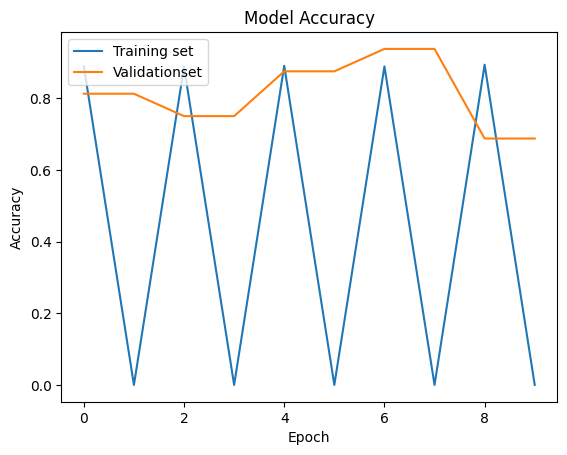

<Figure size 640x480 with 0 Axes>

In [33]:
# Accuracy
plt.plot(cnn_model.history['accuracy'])
plt.plot(cnn_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validationset'], loc='upper left')
plt.savefig('train_accuracy.png')
plt.show(block=False)
plt.clf()

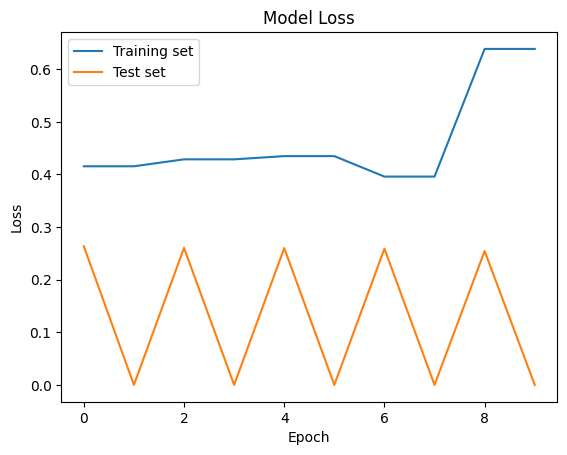

<Figure size 640x480 with 0 Axes>

In [34]:
# Loss
plt.plot(cnn_model.history['val_loss'])
plt.plot(cnn_model.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Test set'],
loc='upper left')
plt.savefig('train_loss.png')
plt.show(block=False)
plt.clf()